In [1]:
import os

import pandas as pd

In [2]:
!tree -h ./data/dropbox/Dave\ Liu\ Lab

./data/dropbox/Dave Liu Lab
└── [4.0K]  Derek
    ├── [4.0K]  scRNAseq
    │   └── [4.0K]  melanoma
    │       ├── [2.5M]  metadata_all.txt
    │       ├── [805M]  tumors_norm_counts.txt
    │       └── [805M]  tumors_tpm.txt
    └── [4.0K]  simulations
        └── [4.0K]  experiments
            └── [4.0K]  generate_cohorts_for_emma
                ├── [ 48M]  sim2_sd.RData
                └── [ 27M]  sim_2sd.txt

6 directories, 5 files


In [3]:
df_norm_counts = pd.read_csv(
    filepath_or_buffer='./data/dropbox/Dave Liu Lab/Derek/scRNAseq/melanoma/tumors_norm_counts.txt',
    nrows=1000,
    sep='\t',
    index_col=0
)

In [4]:
df_norm_counts.dtypes

cy78_CD45_neg_1_B04_S496_comb                      float64
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb           float64
CY88_5_B10_S694_comb                               float64
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb    float64
cy78_CD45_neg_3_H06_S762_comb                      float64
                                                    ...   
CY75_1_CD45_CD8_3__S168_comb_BCD8                  float64
CY75_1_CD45_CD8_8__S338_comb_BCD8                  float64
monika_D7_S132_comb_BCD8_3                         float64
CY75_1_CD45_CD8_8__S289_comb_BCD8                  float64
CY75_1_CD45_CD8_8__S351_comb_BCD8                  float64
Length: 7186, dtype: object

In [5]:
df_norm_counts

,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GENE,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,8.144184,5.915091,7.243164,6.019502,7.974753,5.557257,4.639058,7.655502,3.554834,8.791371,...,8.116349,5.756490,0.000000,5.258820,3.930454,5.945186,6.661408,6.792322,0.000000,4.820741
ELMO2,2.639232,0.000000,0.732052,3.687956,2.599318,1.691087,2.019346,0.136191,0.000000,1.724650,...,1.580145,0.000000,1.075875,0.000000,5.616211,0.000000,0.000000,0.000000,0.000000,6.166655
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,3.656496,0.000000,0.536053,3.041418,4.132741,2.827006,0.000000,2.873420,0.000000,4.787694,...,0.000000,1.407081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABL1,0.000000,0.000000,0.000000,2.634129,0.000000,0.449957,0.000000,0.090853,1.712816,0.380729,...,0.000000,0.000000,0.000000,1.316146,0.000000,0.000000,0.000000,0.000000,1.776946,0.000000
PTPRG,0.093560,0.000000,0.000000,0.000000,0.000000,0.374066,2.087123,2.690194,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NCOR1,1.204141,0.000000,2.467019,2.484911,0.551885,0.276199,2.635522,2.501057,1.519542,3.089837,...,4.490570,5.263973,4.975034,2.012569,0.000000,4.793011,1.626205,2.290129,0.848798,4.945608


In [8]:
df_norm_counts.sum(axis=0).sort_values()

cy129PA_CD45neg_CD90neg_S141           57.257051
Cy72_CD45_H12_S864_comb                98.108289
cy129PA_CD45neg_CD90neg_S174          116.703050
cy129PA_CD45neg_CD90neg_S183          121.046204
cy105_CD45neg_S268                    125.490928
                                        ...     
cy103_CD45neg_CD90neg_S150            935.554408
cy88_cd_45_pos_H12_S480_comb          967.984099
cy88_cd_45_pos_3_H12_S672_comb        981.659958
CY88CD45POS_7_G05_S269_comb           994.409848
CY75_1_CD45_CD8_8__S335_comb_BCD8    1037.724920
Length: 7186, dtype: float64

In [7]:
df_norm_counts.sum(axis=1).sort_values()

GENE
MIR122           0.000000
MIR548AU         0.000000
RBMY1A1          0.000000
MIR1976          0.000000
MIR3180-3        0.000000
                 ...     
RPL27        46834.003584
RPS11        51621.279726
RPL4         54468.831850
RPS18        61625.193538
B2M          70456.239075
Length: 1000, dtype: float64

In [9]:
import numpy as np

In [10]:
import plotly.express as px

In [11]:
percent_nonzero = df_norm_counts.astype(bool).mean(axis=0)
percent_nonzero

cy78_CD45_neg_1_B04_S496_comb                      0.328
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb           0.088
CY88_5_B10_S694_comb                               0.230
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb    0.232
cy78_CD45_neg_3_H06_S762_comb                      0.304
                                                   ...  
CY75_1_CD45_CD8_3__S168_comb_BCD8                  0.153
CY75_1_CD45_CD8_8__S338_comb_BCD8                  0.161
monika_D7_S132_comb_BCD8_3                         0.191
CY75_1_CD45_CD8_8__S289_comb_BCD8                  0.199
CY75_1_CD45_CD8_8__S351_comb_BCD8                  0.175
Length: 7186, dtype: float64

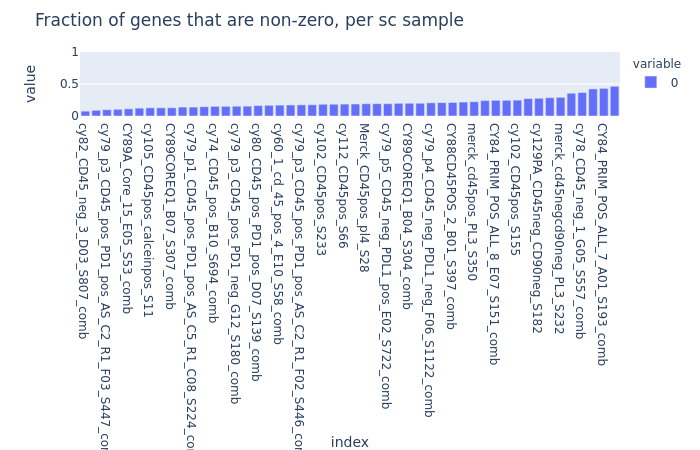

In [13]:
fig = px.bar(percent_nonzero.sample(n=50).sort_values())

fig.update_layout(
    title='Fraction of genes that are non-zero, per sc sample',
)

fig.update_yaxes(range=[0, 1])

fig.show(renderer='jupyterlab+png')

In [ ]:
df_norm_counts.astype(bool).mean(axis=0).sort_values()

In [ ]:
px.bar(df_norm_counts['cy81_FNA_CD45_neg_H02_S1046_comb'])